In [1]:
import matplotlib.pyplot as plt
from visualizer import print_result, display_stocks_graph
import pandas as pd
import yfinance as yf
import time
import numpy as np

#### Get Yahoo Finance Data

In [2]:
import os
from import_stocks import read_stock_symbols
from yahoo_data_provider import get_yahoo_data

# Define the base path relative to the current working directory
base_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'assets'))
stocks_symbol_list_path = os.path.join(base_path, 'nasdaq_100_stocks.csv')


######### Define no of stocks ###############3
no_of_stocks = 6


stocks = read_stock_symbols(stocks_symbol_list_path, num_symbols=no_of_stocks)
start_date=(2018, 1, 1)
end_date=(2020, 1, 1)

data, tickers, mu, sigma = get_yahoo_data(stocks, start_date, end_date)

print("Stocks: ", stocks)
print("Mean return: ", mu)
print("Covariance: ", sigma)

Stocks:  ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA']
Mean return:  [0.00127331 0.00139123 0.00058917 0.00057577 0.00105956 0.00075576]
Covariance:  [[0.00030072 0.00017684 0.00017932 0.00017642 0.00020524 0.00026963]
 [0.00017684 0.00023657 0.00018949 0.00018884 0.00022097 0.00026415]
 [0.00017932 0.00018949 0.00027228 0.00026919 0.00021745 0.00026808]
 [0.00017642 0.00018884 0.00026919 0.00026873 0.00021548 0.00026709]
 [0.00020524 0.00022097 0.00021745 0.00021548 0.00036201 0.00032911]
 [0.00026963 0.00026415 0.00026808 0.00026709 0.00032911 0.00080826]]


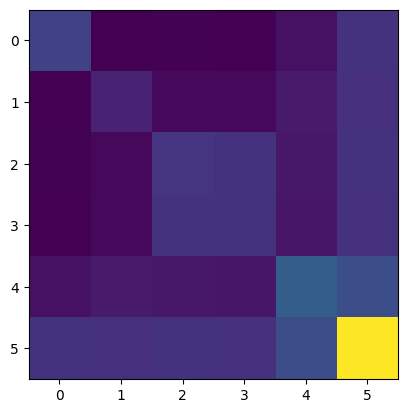

In [3]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

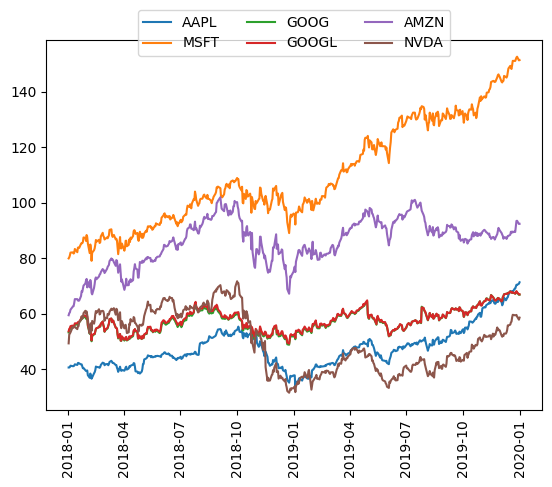

In [4]:
display_stocks_graph(data)

### Define Portfolio Optimization Problem

In [5]:
from portfolio import define_portfolio_optimization_problem

q = 0.5  # set risk factor
budget = 3  # set budget

portfolio, portfolio_quadratic_program = define_portfolio_optimization_problem(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget)
print("Portfolio Quadratic Program: ", portfolio_quadratic_program)

Portfolio Quadratic Program:  minimize 0.00015036037323279343*x_0^2 + 0.00017683582889411214*x_0*x_1 + 0.0001793202716364157*x_0*x_2 + 0.00017641924882770216*x_0*x_3 + 0.0002052429664644212*x_0*x_4 + 0.0002696349526011955*x_0*x_5 + 0.00011828306813723623*x_1^2 + 0.00018949231393871048*x_1*x_2 + 0.00018884380243904076*x_1*x_3 + 0.00022096610797327093*x_1*x_4 + 0.0002641529180560564*x_1*x_5 + 0.00013614208488725064*x_2^2 + 0.00026919327460403383*x_2*x_3 + 0.00021744609204961263*x_2*x_4 + 0.00026808255788649443*x_2*x_5 + 0.00013436266419996728*x_3^2 + 0.00021547803138948136*x_3*x_4 + 0.00026709307381703906*x_3*x_5 + 0.00018100406096977173*x_4^2 + 0.00032911376342886653*x_4*x_5 + 0.0004041278493139102*x_5^2 - 0.0012733087261222072*x_0 - 0.0013912267385656476*x_1 - 0.000589172999480696*x_2 - 0.0005757652860410011*x_3 - 0.0010595567458522577*x_4 - 0.0007557635846924638*x_5 (6 variables, 1 constraints, 'Portfolio optimization')


### Solve the portfolio optimization problem

#### Solve using NumPyMinimumEigensolver (as a classical reference)

In [6]:
from solver import solve_using_numpy_minimum_eigensolver

result = solve_using_numpy_minimum_eigensolver(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1. 0.], value -0.0027
Optimal Companies: ['AAPL', 'MSFT', 'AMZN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 1 0 0 1 0]	-0.0027		1.0000


#### Solve using Solution using `SamplingVQE`

In [7]:
from solver import solve_using_sampling_vqe

num_stocks = len(stocks)
result = solve_using_sampling_vqe(portfolio_quadratic_program, num_stocks)

print_result(stocks, portfolio, result)

Optimal: selection [0. 1. 1. 0. 1. 0.], value -0.0020
Optimal Companies: ['MSFT', 'GOOG', 'AMZN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 1 0 1 0]	-0.0020		0.3359
[0 1 1 0 0 1]	-0.0014		0.1748
[0 0 1 0 1 1]	-0.0009		0.1455
[0 1 0 0 1 1]	-0.0017		0.1133
[0 1 1 1 0 0]	-0.0015		0.0713
[0 0 0 0 1 1]	-0.0009		0.0322
[0 1 1 0 0 0]	-0.0015		0.0234
[0 0 1 1 0 1]	-0.0004		0.0137
[0 0 1 1 1 0]	-0.0011		0.0137
[0 0 1 0 1 0]	-0.0011		0.0098
[0 0 1 1 1 1]	-0.0006		0.0098
[0 1 1 1 0 1]	-0.0011		0.0078
[0 1 0 0 1 0]	-0.0019		0.0078
[0 1 1 0 1 1]	-0.0015		0.0059
[0 1 0 1 0 1]	-0.0013		0.0049
[1 1 1 0 1 0]	-0.0025		0.0049
[0 0 0 1 0 1]	-0.0005		0.0029
[0 0 1 1 0 0]	-0.0006		0.0029
[0 1 0 1 1 0]	-0.0020		0.0029
[0 1 0 1 1 1]	-0.0015		0.0020
[0 0 1 0 0 1]	-0.0005		0.0020
[1 1 1 0 0 1]	-0.0019		0.0020
[0 0 1 0 0 0]	-0.0005		0.0020
[0 0 0 1 1 0]	-0.0011		0.0010
[0 0 0 0 1 0]	-0.0009		0.0010
[0 1 0 1 0 0]	-0.0

#### Solve using Solution using `QAOA`

In [ ]:
from solver import solve_using_qaoa

num_stocks = len(stocks)
result = solve_using_qaoa(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

In [8]:
import matplotlib.pyplot as plt
from visualizer import print_result, display_stocks_graph
import pandas as pd
import yfinance as yf
import time
import numpy as np
from get_optimal_stocks import *
from datetime import datetime

# Define start and end dates
start = datetime(*start_date)
end = datetime(*end_date)

Portfolio_total_value = 1000000 # This is in dollar

# Create an empty dictionary to store dataframes
stock_data = {}

# Define the stock symbols (Yahoo Finance uses different symbols compared to Quandl)
stock_symbols = get_optimal_stocks(tickers, result) # Default :['JPM', 'C', 'BAC', 'WFC']

# Fetch data from Yahoo Finance
for stock_symbol in stock_symbols:
    try:
        stock_df = yf.download(stock_symbol, start=start, end=end)

        # Process the stock data
        stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

        # Store the dataframe in the dictionary
        stock_data[stock_symbol] = stock_df

    except Exception as e:
        print(f"Error retrieving data for symbol: {stock_symbol}. Error message: {e}")

# Access and display dataframes (similar to the original loop)
for stock_name, stock_df in stock_data.items():
    print(f"\n{stock_name} DataFrame Head:")
    print(stock_df.head())


import numpy as np

# Generate random allocations
allocations = np.random.rand(len(stock_symbols))
# Normalize allocations so they add up to 1
allocations /= allocations.sum()
print(allocations)

# Calculate and add position values to each dataframe
for stock_symbol, allocation in zip(stock_symbols, allocations):
    stock_df = stock_data[stock_symbol]
    stock_df['Allocation'] = stock_df['Normed Return'] * allocation
    stock_df['Position Values'] = stock_df['Allocation'] * Portfolio_total_value

# Display the head of the JPM dataframe with allocation and position values
print("\nJPM DataFrame with Allocation and Position Values Head:")
print(stock_data[stock_symbols[0]].head())

# Combine the position values into a single DataFrame and calculate the total position
portfolio_val = pd.concat([stock_data[symbol]['Position Values'] for symbol in stock_symbols], axis=1)
portfolio_val.columns = [f"{symbol} Pos" for symbol in stock_symbols]
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

# Display the head of the portfolio valuation DataFrame
print("\nPortfolio Valuation DataFrame Head:")
print(portfolio_val.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MSFT DataFrame Head:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-01-02  86.129997  86.309998  85.500000  85.949997  79.936729  22483800   
2018-01-03  86.059998  86.510002  85.970001  86.349998  80.308754  26061400   
2018-01-04  86.589996  87.660004  86.570000  87.110001  81.015587  21912000   
2018-01-05  87.660004  88.410004  87.430000  88.190002  82.020004  23407100   
2018-01-08  88.199997  88.580002  87.599998  88.279999  82.103722  22113000   

            Normed Return  
Date                       
2018-01-02       1.000000  
2018-01-03       1.004654  
2018-01-04       1.013496  
2018-01-05       1.026062  
2018-01-08       1.027109  

GOOG DataFrame Head:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-01-02  52.417000  53.347000  52.261501  53.

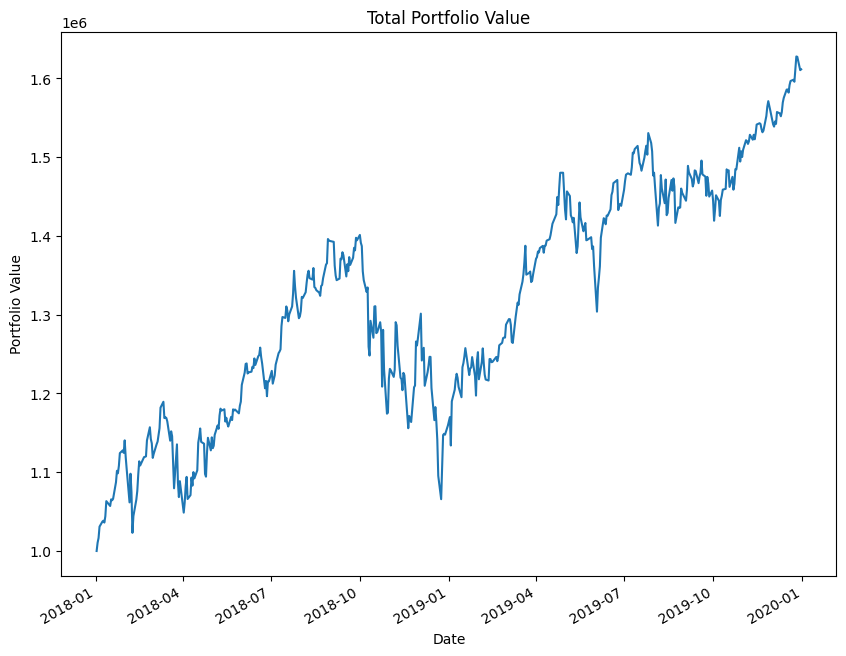

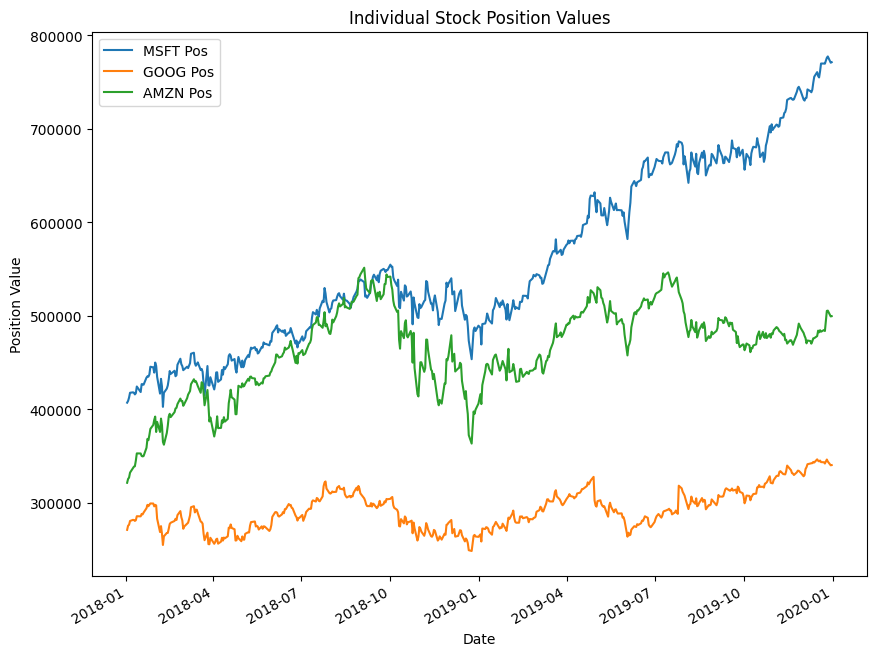

,MSFT Pos,GOOG Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,
2018-01-02,407227.635986,271213.252026,321559.111988,1.000000e+06,NaN
2018-01-03,409122.868296,275664.717401,325667.129450,1.010455e+06,0.010455
2018-01-04,412723.739725,276662.981545,327124.819722,1.016512e+06,0.005994
2018-01-05,417840.618213,280694.255044,332411.980028,1.030947e+06,0.014201
2018-01-08,418267.105727,281893.706910,337206.916080,1.037368e+06,0.006228
...,...,...,...,...,...
2019-12-24,769784.892841,342151.440851,483878.849558,1.595815e+06,-0.001574
2019-12-26,776094.560476,346439.896570,505395.255920,1.627930e+06,0.020124
2019-12-27,777512.894783,344272.742442,505673.803347,1.627459e+06,-0.000289


In [9]:
# Plot the total portfolio value
portfolio_val['Total Pos'].plot(figsize=(10, 8))
plt.title('Total Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()

# Plot the individual stock position values
portfolio_val.drop('Total Pos', axis=1).plot(kind='line', figsize=(10, 8))
plt.title('Individual Stock Position Values')
plt.xlabel('Date')
plt.ylabel('Position Value')
plt.show()


portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val

In [10]:
# Calculate the cumulative return
cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
print('Our cumulative return is {} percent!'.format(cum_ret))

Our cumulative return is 61.15708945443588 percent!


C:\Users\awadh\AppData\Local\Temp\ipykernel_9648\4253317811.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)


In [11]:
portfolio_val['Daily Return'].mean()

0.0010699136122190593

In [12]:
portfolio_val['Daily Return'].std()

0.015423304371842526

In [13]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.06936993438139893

In [14]:
ASR = (252**0.5)*SR
ASR

1.1012135690283051

In [18]:
# Extract and combine the adjusted close prices into a single DataFrame for daily returns
close_data = {symbol: stock_data[symbol]['Adj Close'] for symbol in stock_symbols}

# Combine daily close prices into a single DataFrame
stocks = pd.DataFrame(close_data)

# Display the head of the daily returns DataFrame
print("\nDaily Returns DataFrame Head:")
print(stocks.head())

# Calculate logarithmic returns
log_ret = np.log(stocks / stocks.shift(1))

# Display the head of the logarithmic returns DataFrame
print("\nLogarithmic Returns DataFrame Head:")
print(log_ret.head())


Daily Returns DataFrame Head:
                 MSFT       GOOG       AMZN
Date                                       
2018-01-02  79.936729  53.250000  59.450500
2018-01-03  80.308754  54.124001  60.209999
2018-01-04  81.015587  54.320000  60.479500
2018-01-05  82.020004  55.111500  61.457001
2018-01-08  82.103722  55.347000  62.343498

Logarithmic Returns DataFrame Head:
                MSFT      GOOG      AMZN
Date                                    
2018-01-02       NaN       NaN       NaN
2018-01-03  0.004643  0.016280  0.012694
2018-01-04  0.008763  0.003615  0.004466
2018-01-05  0.012322  0.014466  0.016033
2018-01-08  0.001020  0.004264  0.014322


In [19]:
#calculate the log return mean of each stock
log_ret.mean() * 252

MSFT    0.320657
GOOG    0.114187
AMZN    0.221326
dtype: float64

In [21]:
# Compute pairwise covariance of columns
log_ret.cov()*252

,MSFT,GOOG,AMZN
MSFT,0.059527,0.047879,0.055720
GOOG,0.047879,0.068679,0.055042
AMZN,0.055720,0.055042,0.091403


In [22]:
######## Trying one iteration ################

np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(len(stock_symbols))) # changes to be done here 
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['MSFT', 'GOOG', 'AMZN'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423]


Rebalance to sum to 1.0
[0.46291341 0.51156154 0.02552505]


Expected Portfolio Return
0.2124998481219415


Expected Volatility
0.23710509011997602


Sharpe Ratio
0.8962264286035185


In [23]:
################## For multiple iteration : Monte Carlo ##########################3
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(stock_symbols))) # Change to be made here 

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [24]:
sharpe_arr.max()

1.3097531415499621

In [25]:
sharpe_arr.argmax()

7485

In [36]:
all_weights[1248,:]

weight_list = all_weights
print(weight_list[0])

# 
print(f'Values to be invested in each stock for portfolio of value {Portfolio_total_value} $')
for i in range(len(stock_symbols)):
    print(f'{stock_symbols[i]} : ${weight_list[0][i]* Portfolio_total_value} ')



[0.10145035 0.40532253 0.49322711]
Values to be invested in each stock for portfolio of value 1000000 $
MSFT : $101450.35351927289 
GOOG : $405322.53233710217 
AMZN : $493227.1141436249 


In [ ]:
max_sr_ret = ret_arr[1248]
max_sr_vol = vol_arr[1248]
plt.figure(figsize=(17,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')